# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



The monopoly profits are equal to the revenue minus the costs, i.e. price times demand minus costs. That is, for a given quantity x: 
$$\Pi(x) = xP(x) - C(x) $$
where P(x) is the indirect demand function. Here we have: 
$$x(p) = 2e^{0.5p}\iff P(x) = -2\ln(0.5x)$$
Therefore the monopolist profit for a quantity x is: 
$$\Pi(x) = -2x\ln(0.5x) - 0.5 - x (1-xe^{-x}) $$

This is a concave function, thus a sufficient and necessary optimality condition to the maximization problem is: 
$$x = \text{argmax}_q \Pi(q) \iff \Pi'(x) = 0 \iff -3 + 2xe^{-x} - x^2e^{-x} - 2 \ln(0.5 x) = 0$$
Note that the function is strictly decreasing with $Pi'(0.1)>0$ and $Pi'(2)<0$. Therefore it admits a single root, which can be found using the bisection method. 

In [82]:
function monop_profits(q::Float64)
    # q is the quantity demanded
    indi_demand = -2*ln(0.5*q)
    cost = 0.5 + q(1-q*exp(-q))
    return q*demand - cost
end

function dprofits(x::Float64)
    return -3 + 2*x*exp(-x) - x^2*exp(-x) -2*log(0.5*x)
end

function bisection(f::Function, a::Float64, b::Float64, eps::Float64)
    while (b-a) > eps
        global c = (a+b)/2
        if f(c) * f(a) <= 0
            b = c
        else 
            a = c
        end
    end
    return c
end

bisection (generic function with 2 methods)

In [83]:
a = 0.1
b = 2
epsilon = 0.001

x_star = bisection(dprofits, a, b, epsilon)

println("the optimal monopoly quantity is thus $(x_star)")

the optimal monopoly quantity is thus 0.5610839843750002


---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

The world population growth in 2018 was $1.1\%$ thus $g = 1.011$ is a good guess. The depreciation rate of physical capital in the US was estimated to be around $\delta = 0.059$ in a paper by M. Ishaq Nadiri, Ingmar R. Prucha (1993). A valid guess for the time discount is $\beta = 0.9$. The 2019 US saving rate was $s = 7.6\%$.

In [177]:
g = 1.011
beta = 0.9
delta = 0.059
s = 0.076

0.076

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

We have that the rate of population growth is $g$. Then the detrended variables are: 

$$\hat{k_t}= \frac{k_t}{n_{t}}, \hat{y_t}= \frac{y_t}{n_t} = A\hat{k_t}^\alpha, \hat{c_t}= \frac{c_t}{n_t},\hat{n_t}= \frac{n_t}{n_t} = 1,$$

We thus get that: 
$$\hat{k}_{t+1} = \frac{k_{t+1}}{n_{t+1}} = \frac{1-\delta}{g}\hat{k_t} + \frac{sA}{g}\hat{k_t}^\alpha $$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [367]:
function f(k::Float64, p::Dict{Symbol, Float64})
    return (1 - p[:delta])/p[:g]*k + p[:s]/p[:g]*p[:A]*k^p[:alpha]
end

f (generic function with 1 method)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [368]:
# import Pkg
# Pkg.add("Plots")

the steady state is: 1.2058510124464628


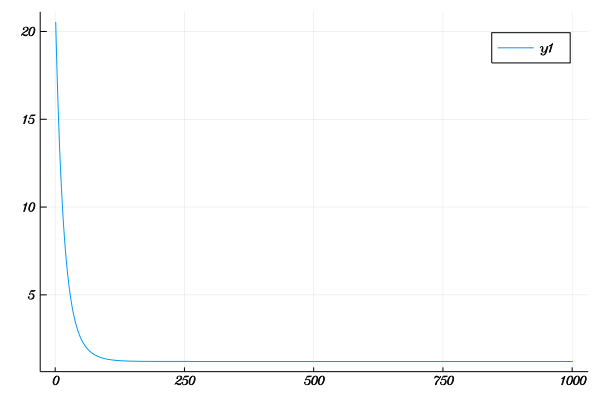

In [371]:
alpha = 0.4
A = 1.03053 # 2017 US total factor productivity 

p = Dict(:alpha=> alpha, :s=>s, :delta=>delta, :A=>A, :g=> g)
k0 = 20.54 # 2018 US GDP 

N = 1000 # number of iterations
fk = zeros(N+1)
fk[1] = k0

for i = 1:N
    fk[i+1] = f(fk[i], p)
end

println("the steady state is: ", fk[end])

using Plots 
plot([1:N+1], fk)

__What factors affect the steady-state level of capital?__

In [372]:
function steady_state(f::Function, k::Float64, p::Dict{Symbol, Float64}, epsilon::Float64)
    k1 = f(k, p)
    while abs(k-k1) > epsilon 
        k = k1
        k1 = f(k1,p)
    end
    return k1
end

steady_state (generic function with 1 method)

In [374]:
epsilon = 0.000001

# base case
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("base case ", steady_state(f, k0, p, epsilon))

# changing alpha 
p = Dict(:alpha=> 0.9, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing alpha ", steady_state(f, k0, p, epsilon))

# changing s
p = Dict(:alpha=> 0.4, :s=>0.3, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing s ", steady_state(f, k0, p, epsilon))

# changing delta 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.3, :A=>1.03053, :g => 1.011)
println("changing delta ", steady_state(f, k0, p, epsilon))

# changing A 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.6, :g => 1.011)
println("changing A ", steady_state(f, k0, p, epsilon))

# changing g
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.6)
println("changing g ", steady_state(f, k0, p, epsilon))

base case 1.2058739353010766
changing alpha 3.0745540673060994
changing s 11.888870193830874
changing delta 0.1004327259161261
changing A 2.51032441745436
changing g 0.028731147857356427


From our simulation, it seems that all the parameters in our dictionary affect the steady state level of capita. 

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [390]:
# studying the stability
epsilon = 0.000001
k0 = 2.2
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g=>1.011)
kbar = steady_state(f, k0, p, epsilon)

# if k0 > kbar
k0 = kbar + 1.5
println("the steady state starting above kbar is: ", steady_state(f, k0, p, epsilon))

# if k0 < kbar
k0 = kbar - 1.
println("the steady state starting under kbar is: ", steady_state(f, k0, p, epsilon))

the steady state starting above kbar is: 1.2058738952301498
the steady state starting under kbar is: 1.205828494475531


The equilibrium is stable: you always converge to the steady state whatever your initial value is. 

We compute the order of convergence in 2 different ways: through the limit of $\frac{|\bar{k} - k_{t+1}|}{|\bar{k} - k_{t}|}$ and through the limit of $\frac{\ln\left|\frac{k_{t+1}-k_t}{k_t - k_{t-1}}\right|}{\ln\left|\frac{k_{t}-k_{t-1}}{k_{t-1} - k_{t-2}}\right|} $

In [439]:
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g=>1.011)
kbar = steady_state(f, k0, p, epsilon)
N = 150
k0 = kbar + 10

function convergence(N, k0, f, p::Dict{Symbol, Float64})
    k = k0
    k1 = f(k0, p)
    cnt = 0
    while abs(k-k1) > epsilon 
        k = k1
        k1 = f(k1,p)
        cnt = cnt + 1
    end
    return cnt
end

346

In [450]:
# base case
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("base case ", convergence(N, k0, f, p))

# changing alpha 
p = Dict(:alpha=> 0.9, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing alpha ", convergence(N, k0, f, p))

# changing s
p = Dict(:alpha=> 0.4, :s=>0.3, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing s ", convergence(N, k0, f, p))

# changing delta 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.3, :A=>1.03053, :g => 1.011)
println("changing delta ", convergence(N, k0, f, p))

# changing A 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>2., :g => 1.011)
println("changing A ", convergence(N, k0, f, p))

# changing g
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.0001)
println("changing g ", convergence(N, k0, f, p))

base case 346
changing alpha 1812
changing s 297
changing delta 75
changing A 347
changing g 403


We see that all the parameters in our dictionary affect speed of convergence except for $A$. 

__Compute the steady-state directly using a Newton method and compare convergence speed.__

We have that, at optimal, $\dot k(k) = 0$ where $\dot{k}$ is the time derivative of $k$. In the Solow model, we know that $\dot k(k) = sk^\alpha -(\delta + g-1)k$. We can use Newton's method to find the root of $\dot k(k)$. 


Note that the derivative of $\dot{k}$ as a function of $k$ is $\dot{k}(k)' = s\alpha k^{\alpha-1}-(\delta+g-1)$. 


In [395]:
function Newton(f::Function, df::Function, x0::Float64, p::Dict{Symbol, Float64}, eta::Float64, epsilon::Float64)
    xn = x0
    xn1 = xn - f(xn, p)/df(xn, p)
    while abs(xn1-xn) > eta && abs(f(xn, p)) > epsilon 
        xn = xn1
        xn1 = xn - f(xn,p)/df(xn,p)
    end
    return xn1
end

Newton (generic function with 1 method)

In [396]:
function kdot(k,p)
    return p[:s]*k^p[:alpha] - (p[:delta]+p[:g]-1)*k
end

function dkdot(k,p)
    return p[:s]*p[:alpha]*k^(p[:alpha]-1)-(p[:delta]+p[:g]-1)
end

dkdot (generic function with 1 method)

In [397]:
k0 = 4.
eta = 0.
epsilon = 0.0000001
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("Newton ", Newton(kdot, dkdot, k0, p, eta, epsilon))
println("steady state ", steady_state(f, k0, p, epsilon))

Newton 1.1469009710500007
steady state 1.2058532549170764


In [451]:
function Newton_conv(f::Function, df::Function, k0::Float64, p::Dict{Symbol, Float64})
    xn = k0
    xn1 = xn - f(xn, p)/df(xn, p)
    cnt = 0
    while abs(xn1-xn) > eta && abs(f(xn, p)) > epsilon 
        xn = xn1
        xn1 = xn - f(xn,p)/df(xn,p)
        cnt = cnt + 1
    end
    return cnt
end

N = 1000
conv_time = Newton_conv(kdot, dkdot, k0, p)

println("Newton times to convergence\n_________________________________")
# base case
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("base case ", Newton_conv(kdot, dkdot, k0, p))

# changing alpha 
p = Dict(:alpha=> 0.9, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing alpha ", Newton_conv(kdot, dkdot, k0, p))

# changing s
p = Dict(:alpha=> 0.4, :s=>0.3, :delta=>0.059, :A=>1.03053, :g => 1.011)
println("changing s ", Newton_conv(kdot, dkdot, k0, p))

# changing delta 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.3, :A=>1.03053, :g => 1.011)
println("changing delta ", Newton_conv(kdot, dkdot, k0, p))

# changing A 
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>2., :g => 1.011)
println("changing A ", Newton_conv(kdot, dkdot, k0, p))

# changing g
p = Dict(:alpha=> 0.4, :s=>0.076, :delta=>0.059, :A=>1.03053, :g => 1.0001)
println("changing g ", Newton_conv(kdot, dkdot, k0, p))

Newton times to convergence
_________________________________
base case 4
changing alpha 5
changing s 2
changing delta 5
changing A 4
changing g 4


Newton is always much faster. However we notice a slight change in the value obtained which could be due to an error in my code. 

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

Analytically, the Solow model gives that the golden rule saving rate $s_G$ verifies $ f'(k^*(s)) = \delta$ which yields $s_G = \alpha$ for a Cobb-Douglas production function (proven in 2nd year). 

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__



---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [452]:
#Pkg.add("Optim")
#using Optim

In [453]:
h(X) = 1-(X[1]-0.5)^2-(X[2]-0.3)^2
X0 = [0.45,0.25]
optimize(h,X0)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [1.46e+154, 1.64e+153]
    Minimum:   -Inf

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [4.50e-01, 2.50e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2638


The optimization fails as the maximum number of iterations is reached. 

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [454]:
function grad_h(g, X)
    g[1] = -2.0 * X[1] + 1
    g[2] = -2.0 * X[2] + 0.6
end
neg_h(x) = -1*h(x)
lower = [-Inf, -Inf]
upper = [0.3, Inf]
X0 = [0.2, 0.1]
inner_optimizer = GradientDescent()
results = optimize(neg_h, lower, upper, X0, Fminbox(inner_optimizer))

 * Status: success

 * Candidate solution
    Minimizer: [3.00e-01, 3.00e-01]
    Minimum:   -9.600000e-01

 * Found with
    Algorithm:     Fminbox with Gradient Descent
    Initial Point: [2.00e-01, 1.00e-01]

 * Convergence measures
    |x - x'|               = 1.67e-16 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.93e-16 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.00e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    6
    f(x) calls:    807
    ∇f(x) calls:   807


__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

Using KKT, this problem is equivalent to solving: 
$$
\begin{cases}
\nabla (f + \lambda (x-0.3)) = 0 \\
\lambda(x-0.3) = 0 \\
\end{cases}
\iff
\begin{cases}
\lambda = 2x \\
y = 0.3\\
\lambda(x-0.3) = 0 \\
\end{cases}
\iff
\begin{cases}
y = 0.3\\
\ 2x(x-0.3) = 0 \\
\end{cases}
\iff
\begin{cases}
y = 0.3\\
\ x = 0 \text{ or } x = 0.3 \\
\end{cases}
$$

__Solve using NLSolve.jl__

In [300]:
Pkg.add("NLsolve")
using NLsolve

  Resolving package versions...
  Installed NLsolve ─ v4.3.0
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
  [2774e3e8] + NLsolve v4.3.0
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
  [2774e3e8] + NLsolve v4.3.0
┌ Info: Precompiling NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1260


---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

The KKT conditions are: 
\begin{cases}
\ \frac{\partial U}{\partial c_1}-\lambda p_1 = 0 \\
\ \frac{\partial U}{\partial c_2}-\lambda p_2 = 0 \\ 
\ \lambda(p_1c_1+p_2c_2-I) = 0
\end{cases}

__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

Solving the KKT conditions: 

$$
\begin{cases}
\ \frac{\partial U}{\partial c_1}-\lambda p_1 = 0 \\
\ \frac{\partial U}{\partial c_2}-\lambda p_2 = 0 \\ 
\ \lambda(p_1c_1+p_2c_2-I) = 0
\end{cases}
\iff
\begin{cases}
\ \frac{\beta_1}{c_1 - \gamma_1} = \lambda p_1\\\\
\ \frac{\beta_2}{c_2 - \gamma_2} =  \lambda p_2\\\\
\ \lambda(p_1 c_1 + p_2 c_2 -I) = 0
\end{cases}
\iff 
\begin{cases}
\ \frac{\beta_1}{c_1 - \gamma_1} = \lambda p_1\\\\
\ \frac{\beta_2}{c_2 - \gamma_2} =  \lambda p_2\\\\
\ c_1 = \frac{I-p_2c_2}{p_1}
\end{cases}
$$
where we used that $\lambda\neq 0$ as otherwise $\beta_1 = \beta_2 = 0$
The system is thus equivalent to: 
$$
\begin{cases}
\ \lambda = \frac{\beta_1}{I-p_2c_2 - p_1\gamma_1}\\\\
\ \frac{\beta_2}{c_2 - \gamma_2} =  \frac{\beta_1}{I-p_2c_2 - p_1\gamma_1}p_2\\\\
\ c_1 = \frac{I-p_2c_2}{p_1}
\end{cases}
$$
Which yields: 
$$
c_1 = \frac{\beta_1(I- p_2\gamma_2) + \gamma_1 p_1\beta_2}{p_1\beta_2 + \beta_1p_1}, c_2 = \frac{\beta_2(I- p_1\gamma_1) + \gamma_2 p_2\beta_1}{p_2\beta_1 + \beta_2p_2}, \lambda = \frac{\beta_1 + \beta_2}{I -\gamma_2p_2 - p_1\gamma_1}
$$


__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__



Let $U\in\mathbb{R}^+$ be a fixed level of utility. We get the equation of the isoutility curves by solving: 
$$
U = \beta_1\ln(c_1 - \gamma_1) + \beta_2\ln(c_2 - \gamma_2) \iff e^U = (c_1-\gamma_1)^{\beta_1}(c_2-\gamma_2)^{\beta_2}
$$
Solving to express $c_2(c_1)$ we get: 
$$c_2(c_1) = \left(\frac{e^U}{(c_1 - \gamma_1)^{\beta_1}} \right)^{\frac{1}{\beta_2}} + \gamma_2$$

In [342]:
function C_opt(p::Dict{Symbol,Float64})
    c1 = (p[:beta_1]*(p[:I]-p[:p2]*p[:gamma_2]) + p[:gamma_1]*p[:p1]*p[:beta_2])/ (p[:p1]*p[:beta_2] + p[:beta_1]*p[:p1])
    c2 = (p[:beta_2]*(p[:I]-p[:p1]*p[:gamma_1]) + p[:gamma_2]*p[:p2]*p[:gamma_1])/(p[:p2]*p[:beta_1] + p[:beta_2]*p[:p2])
   return [c1,c2]
end

function iso(c1::Float64,U::Float64,p::Dict{Symbol,Float64})
  return (exp(U)/(c1-p[:gamma_1])^p[:beta_1])^(1/p[:beta_2]) + p[:gamma_2]
end

function BC(c1::Float64,p::Dict{Symbol,Float64})
    return (p[:I] - p[:p1]*c1)/p[:p2]
end

BC (generic function with 1 method)

In [345]:
c1vals = [_ for _ in range(0.4,stop = 15, step = 0.05)];
p = Dict(:I=>20., :p1 =>1.5, :p2 => 2.7,:beta_1 => 0.8, :beta_2 => 0.3, :gamma_1 =>0.4, :gamma_2 => 0.1)
BL = [BC(x,p) for x in c1vals]
curve1 = [iso(x,1.,p) for x in c1vals]
curve2 = [iso(x,.5,p) for x in c1vals]
curve3 = [iso(x,1.5,p) for x in c1vals]
(c1eq,c2eq) = C_opt(p)

2-element Array{Float64,1}:
 9.675151515151514
 1.9959595959595955

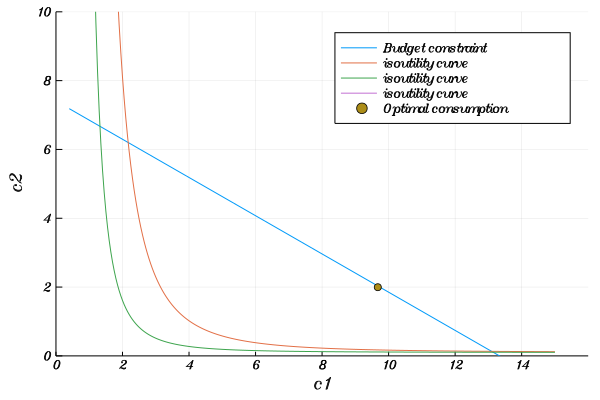

In [460]:
plt = plot(c1vals,BL, label="Budget constraint",ylims = (0,10),xlims = (0,16),xlabel="c1", ylabel = "c2")
plot!(plt, c1vals, curve1, label = "isoutility curve")
plot!(plt, c1vals, curve2, label = "isoutility curve")
plot!(plt, c1vals, curve3, label = "isoutility curve")
scatter!(plt,[c1eq], [c2eq], label="Optimal consumption")